# Chicago Crime Data Set Analysis
Data Set: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

## The Dataset has 6.63 million rows and 22 columns. Python tends to crash when plotting. Sampled data is used for plotting. 

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn import cross_validation as cv

In [3]:
#Reading data
crime_data=pd.read_csv("C:\Data\Chicago Crime\Crimes_-_2001_to_present.csv") 

#Filtering only for required columns
data_new= crime_data.loc[:,['ID','Date','Block','IUCR','Primary Type','Description','Location Description','Arrest',
                      'Domestic','Beat','District','FBI Code','Ward','Community Area','Location']]
data_new.shape

(6629370, 15)

In [4]:
#Checking the columns for null values
print data_new.apply(lambda x: sum(x.isnull()))

#Unique values in each attribute
print data_new.apply(lambda x: len(x.unique()))

ID                           0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      3565
Arrest                       0
Domestic                     0
Beat                         0
District                    47
FBI Code                     0
Ward                    614854
Community Area          616030
Location                 58539
dtype: int64
ID                      6629370
Date                    2646673
Block                     59569
IUCR                        402
Primary Type                 35
Description                 380
Location Description        179
Arrest                        2
Domestic                      2
Beat                        304
District                     25
FBI Code                     26
Ward                         51
Community Area               79
Location                 856370
dtype: int64


## Missing values
ID                           0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      3565
Arrest                       0
Domestic                     0
Beat                         0
District                    47
FBI Code                     0
Ward                    614854
Community Area          616030
Location                 58539
dtype: int64
## Unique values
ID                      6629370
Date                    2646673
Block                     59569
IUCR                        402
Primary Type                 35
Description                 380
Location Description        179
Arrest                        2
Domestic                      2
Beat                        304
District                     25
FBI Code                     26
Ward                         51
Community Area               79
Location                 856370
dtype: int64

### Preprocessing
Location Description 3565 missing values
District 47 missing values
Ward 10% of the data missing
Location 0.08% of the data missing
Community Area 10% of the data missing

In [5]:
#Removing missing values:
#Location Description
data_new['Location Description'] = data_new['Location Description'].fillna(data_new['Location Description'].mode()[0])
data_new['District']=data_new['District'].fillna(data_new['District'].mean())
data_new['Ward']=data_new['Ward'].fillna(data_new['Ward'].mean())
data_new['Location'] = data_new['Location'].fillna(data_new['Location'].mode()[0])
data_new['Community Area'] = data_new['Community Area'].fillna(data_new['Community Area'].mode()[0])

In [6]:
#Filter categorical variables
categorical_columns = [x for x in data_new.dtypes.index if data_new.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['ID','Case Number','Date']]
#Print frequency of categories
for col in categorical_columns:
    print '\nFrequency of Categories for varible %s'%col
    print data_new[col].value_counts()


Frequency of Categories for varible Block
100XX W OHARE ST                       15091
001XX N STATE ST                       11858
076XX S CICERO AVE                      9153
008XX N MICHIGAN AVE                    8139
0000X N STATE ST                        7742
023XX S STATE ST                        5206
063XX S DR MARTIN LUTHER KING JR DR     4891
064XX S DR MARTIN LUTHER KING JR DR     4832
0000X W TERMINAL ST                     4427
001XX W 87TH ST                         4031
022XX S STATE ST                        3984
008XX N STATE ST                        3896
012XX S WABASH AVE                      3658
009XX W BELMONT AVE                     3462
006XX N MICHIGAN AVE                    3382
057XX S CICERO AVE                      3376
005XX E BROWNING AVE                    3303
011XX W WILSON AVE                      3272
038XX W ROOSEVELT RD                    3260
0000X S STATE ST                        3245
002XX W 87TH ST                         3155
071XX S JEFF

## Converting Date and Time

In [7]:
from datetime import datetime
data_new['Date'] = pd.to_datetime(data_new.Date,format='%m/%d/%Y %I:%M:%S %p') 
crime_data['Date']=  pd.to_datetime(crime_data.Date,format='%m/%d/%Y %I:%M:%S %p') 

## Extracting Year, Month, Day, Hour from Datetime 

In [8]:
for i in (data_new,crime_data):
    i['year']=i.Date.dt.year 
    i['month']=i.Date.dt.month 
    i['day']=i.Date.dt.day
    i['Hour']=i.Date.dt.hour 

## Hypothesis: 
1. Type of Crime
2. Time of Crime
3. Location of Crime

## Extracting features-
1. Day of the Week
2. Day of the Year
3. Minute of the Day

In [9]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = data_new['Date'].apply(applyer)
data_new['weekend']=temp2

In [10]:
data_new['day of week']=data_new['Date'].dt.dayofweek
temp = data_new['Date']
data_new['Day of Year']=data_new['Date'].dt.dayofyear
data_new['Time']=data_new['Date'].dt.time
data_new['Min']=data_new['Date'].dt.hour*60+data_new['Date'].dt.minute+1

### Variables like Primary Type of Crime, IUCR are categorical. To apply K means, these variables will be serialized.

In [13]:
data_new['Crime Code']=data_new['Primary Type'].astype("category").cat.codes
data_new['IUCR Cat']=data_new['IUCR'].astype("category").cat.codes

In [14]:
f1=data_new['Beat'].values
f2=data_new['Day of Year'].values
f3=data_new['Min'].values
f4=data_new['Crime Code'].values

X = np.array(list(zip(f1,f4)))

### Analysing the features:


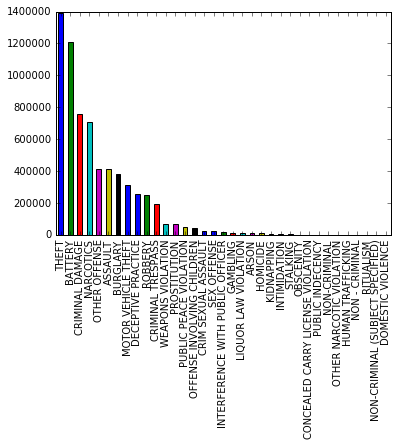

In [15]:
#Plotting the features:
data_new['Primary Type'].value_counts().plot(kind='bar')

THEFT is the most recorded crime.

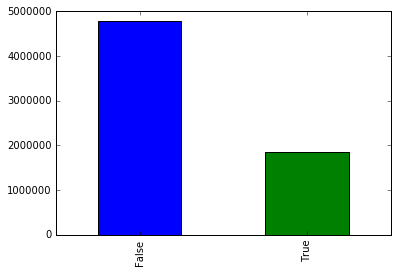

In [16]:
data_new['Arrest'].value_counts().plot(kind='bar')

Not many arrests compared the crime recorded.

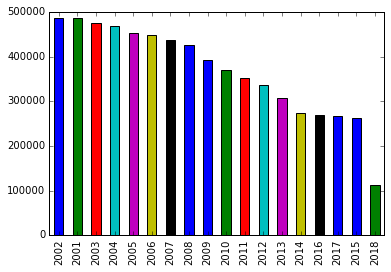

In [17]:
data_new['year'].value_counts().plot(kind='bar')

The crime rate has reduced over the years. It was highest in 2002. Since 2014, the crime rate has reduced. 

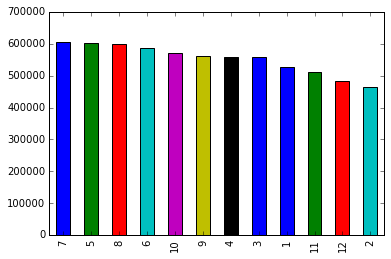

In [18]:
data_new['month'].value_counts().plot(kind='bar')

The Crime is higher between May and August compared to the rest of the year.However, the crime rate is lower during the winter months, February has he lowest crime rate registered. 

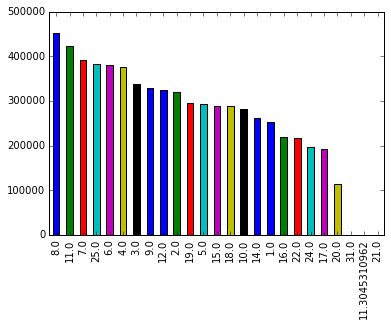

In [19]:
data_new['District'].value_counts().plot(kind='bar')

The District 8 has the highest crime rate. Further Analysis into this to understand, what type of crime occurs in this District.
There are other Features such as Community Area, Beats and Wards. These are realted to District. District is the Police District. Ward is the City Council District. Chicago has 77 Community Areas.
    Beats are the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts.
    

In [20]:
#Splitting to Train and Test set.
train_data, test_data = cv.train_test_split(data_new, test_size=0.25)

In [21]:
print train_data.shape, test_data.shape
print test_data.head()

(4972027, 26) (1657343, 26)
              ID                Date                  Block  IUCR  \
4075461  2421160 2002-10-25 12:05:00     111XX S HALSTED ST  0860   
3988673  2280427 2002-08-06 20:45:00  042XX S FAIRFIELD AVE  0430   
2043680  1554600 2001-05-30 09:00:00       124XX S STATE ST  1792   
2935267  8219407 2011-08-18 04:30:00   004XX N MICHIGAN AVE  1310   
2023228  1528863 2001-05-14 01:38:28    047XX W LAWRENCE AV  1310   

            Primary Type                    Description Location Description  \
4075461            THEFT                   RETAIL THEFT   SMALL RETAIL STORE   
3988673          BATTERY  AGGRAVATED: OTHER DANG WEAPON             SIDEWALK   
2043680       KIDNAPPING       CHILD ABDUCTION/STRANGER               STREET   
2935267  CRIMINAL DAMAGE                    TO PROPERTY                OTHER   
2023228  CRIMINAL DAMAGE                    TO PROPERTY                OTHER   

         Arrest  Domestic  Beat    ...     month day  Hour  weekend  \
40754

### Kmeans Algorithm 

In [22]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

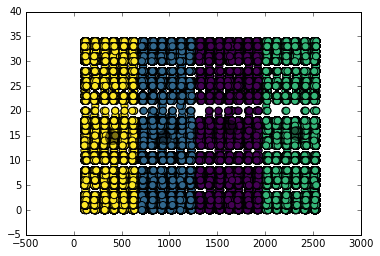

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

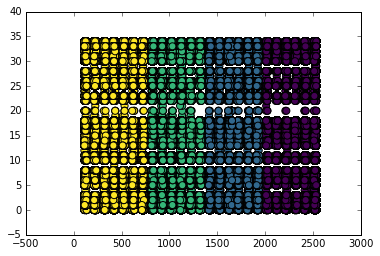

In [24]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Still to do:
1. Apply Random Forest prediction model.
2. Analyse relation between location and type of crime.
3. Analyse relation between time and type of crime.
4. Plot crime on map using python libraries.